<a href="https://colab.research.google.com/github/dineshkaarthik/Datascience_Python/blob/master/DataVisualization2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])

import urllib.request
import json

import seaborn as sns
sns.set(color_codes=True)

# Plotting the composition of data

## Static composition

### Pie chart

In [ ]:
p = sns.load_dataset('penguins')

In [ ]:
p.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
p.groupby('species')['species'].count()

species
Adelie       152
Chinstrap     68
Gentoo       124
Name: species, dtype: int64

In [ ]:
c = p.groupby('species')['species'].count()

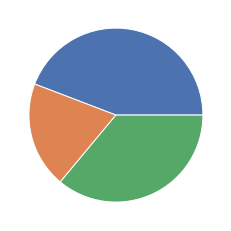

In [ ]:
plt.pie(c);
plt.show()

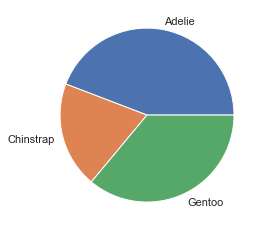

In [ ]:
plt.pie(c, labels=c.index);
plt.show()

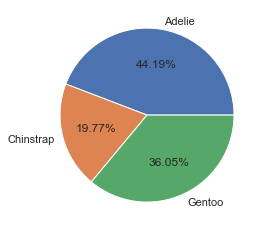

In [ ]:
plt.pie(c, labels=c.index, autopct="%.2f%%");
plt.show()

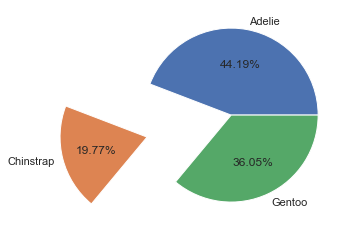

In [ ]:
plt.pie(c, labels=c.index, autopct="%.2f%%",
        explode=[0, 1, 0]);
plt.show()

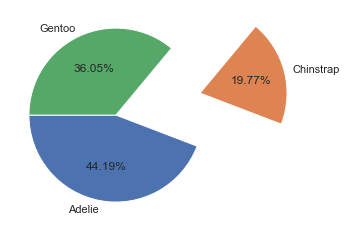

In [ ]:
plt.pie(c, labels=c.index, autopct="%.2f%%",
        explode=[0, 1, 0], startangle=180);
plt.show()

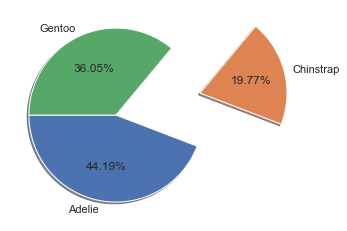

In [ ]:
plt.pie(c, labels=c.index, autopct="%.2f%%",
        explode=[0, 1, 0], startangle=180, shadow=True);
plt.show()

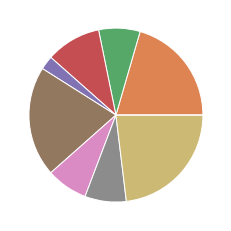

In [ ]:
plt.pie(np.random.randint(0, 10, 10));
plt.show()

### Donut chart

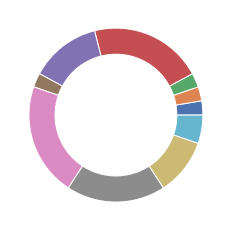

In [ ]:
plt.pie(np.random.randint(0, 10, 10), wedgeprops=dict(width=0.3));
plt.show()

In [ ]:
cmap = plt.get_cmap('Accent')
my_colours = cmap(np.arange(10))

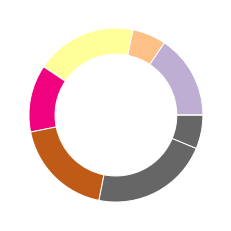

In [ ]:
plt.pie(np.random.randint(0, 10, 10), 
        wedgeprops=dict(width=0.3),
        colors=my_colours);
plt.show()

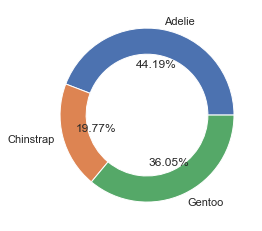

In [ ]:
plt.pie(c, labels=c.index, autopct="%.2f%%", wedgeprops=dict(width=0.3));
plt.show()

In [ ]:
c_i = p.groupby('island')['island'].count()

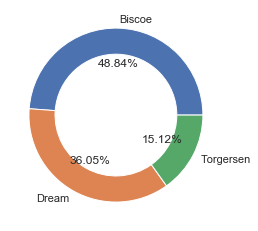

In [ ]:
plt.pie(c_i, labels=c_i.index, autopct="%.2f%%", wedgeprops=dict(width=0.3));
plt.show()

In [ ]:
c = pd.crosstab(p.species, p.island)

In [ ]:
c = c.T

In [ ]:
c

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,124
Dream,56,68,0
Torgersen,52,0,0


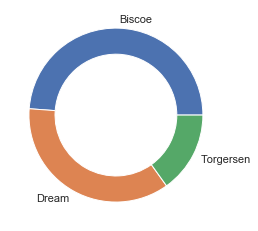

In [ ]:
plt.pie(c.sum(axis=1), labels=c.index, 
        radius = 1, wedgeprops=dict(width=0.3));

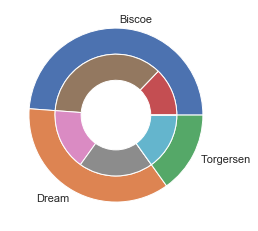

In [ ]:
plt.pie(c.sum(axis=1), labels=c.index, 
        radius = 1, wedgeprops=dict(width=0.3));
plt.pie(c.values.flatten(), radius=0.7, 
        wedgeprops=dict(width=0.3));

In [ ]:
cmap = plt.get_cmap('tab20c')
outer_colors = cmap(np.array([0, 4, 8]))
inner_colors = cmap(np.array([1, 2, 3, 5, 6, 7, 9, 10, 11]))

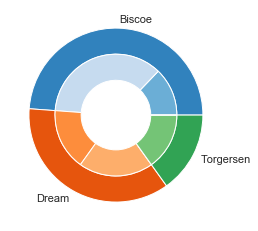

In [ ]:
plt.pie(c.sum(axis=1), labels=c.index, 
        radius = 1, wedgeprops=dict(width=0.3), 
        colors=outer_colors);
plt.pie(c.values.flatten(), radius=0.7, 
        wedgeprops=dict(width=0.3),
        colors=inner_colors);

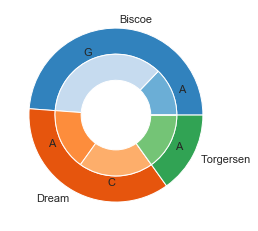

In [ ]:
plt.pie(c.sum(axis=1), labels=c.index, 
        radius = 1, wedgeprops=dict(width=0.3), 
        colors=outer_colors);
plt.pie(c.values.flatten(), radius=0.7, 
        labels = ['A', '', 'G', 'A', 'C', '', 'A', '', ''],
        wedgeprops=dict(width=0.3),
        colors=inner_colors);

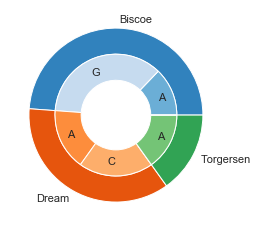

In [ ]:
plt.pie(c.sum(axis=1), labels=c.index, 
        radius = 1, wedgeprops=dict(width=0.3), 
        colors=outer_colors);
plt.pie(c.values.flatten(), radius=0.7, 
        labels = ['A', '', 'G', 'A', 'C', '', 'A', '', ''],
        wedgeprops=dict(width=0.3),
        colors=inner_colors,
        labeldistance=0.75);

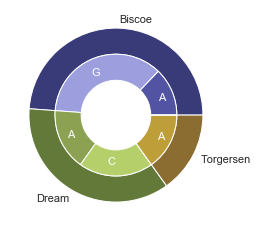

In [ ]:
cmap = plt.get_cmap('tab20b')
outer_colors = cmap(np.array([0, 4, 8]))
inner_colors = cmap(np.array([1, 2, 3, 5, 6, 7, 9, 10, 11]))
plt.pie(c.sum(axis=1), labels=c.index, 
        radius = 1, wedgeprops=dict(width=0.3), 
        colors=outer_colors);
plt.pie(c.values.flatten(), radius=0.7, 
        labels = ['A', '', 'G', 'A', 'C', '', 'A', '', ''],
        wedgeprops=dict(width=0.3),
        colors=inner_colors,
        labeldistance=0.75, textprops=dict(color='w'));

### Stacked bar plot

In [ ]:
url = 'https://api.covid19india.org/states_daily.json'
urllib.request.urlretrieve(url, 'data.json')

with open('data.json') as f:
  data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)

In [ ]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dd,dl,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,0,7,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,0,1,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,0,1,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,0,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,0,1,...,0,Recovered,1,0,0,4,0,0,0,0


In [ ]:
df_ = df.tail(3)
df_.drop('date', axis=1, inplace=True)
df_.set_index('status', inplace=True)
df_ = df_.T
df_ = df_.apply(pd.to_numeric)
df_.drop('tt', inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_.head()

status,Confirmed,Recovered,Deceased
an,16,7,0
ap,6242,7084,40
ar,127,189,0
as,756,1351,14
br,1261,1314,3


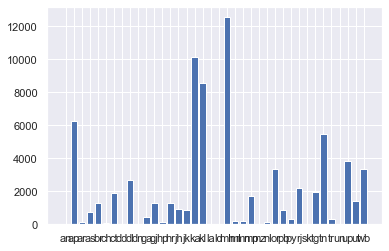

In [ ]:
plt.bar(df_.index, df_.Confirmed);

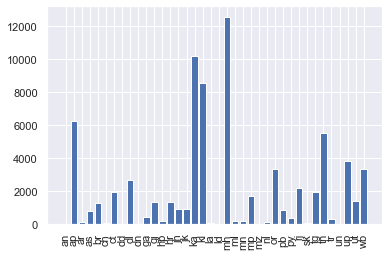

In [ ]:
plt.bar(df_.index, df_.Confirmed);
plt.xticks(rotation=90);

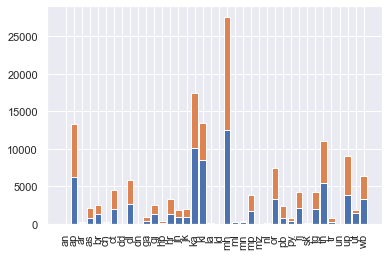

In [ ]:
plt.bar(df_.index, df_.Confirmed);
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed);
plt.xticks(rotation=90);

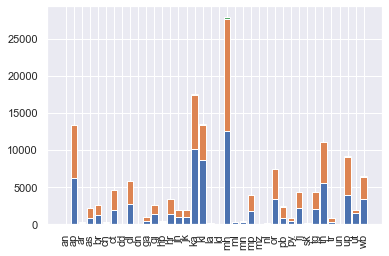

In [ ]:
plt.bar(df_.index, df_.Confirmed);
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed);
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered);
plt.xticks(rotation=90);

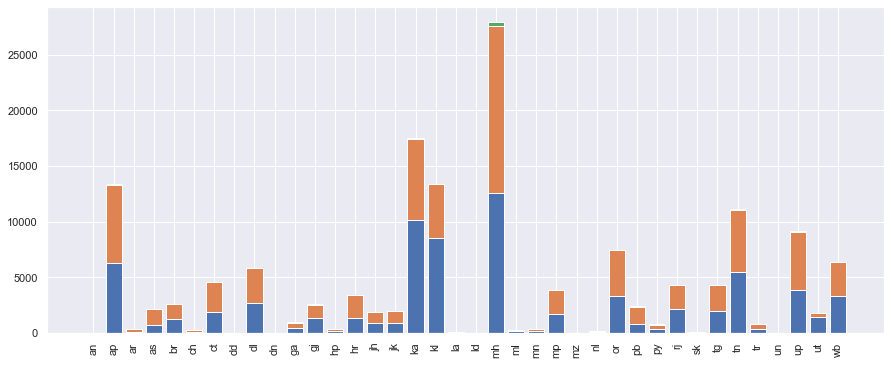

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed);
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed);
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered);
plt.xticks(rotation=90);

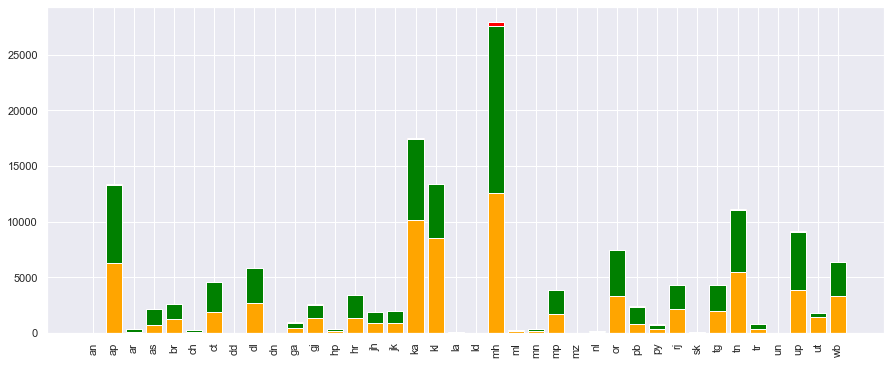

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='Red');
plt.xticks(rotation=90);

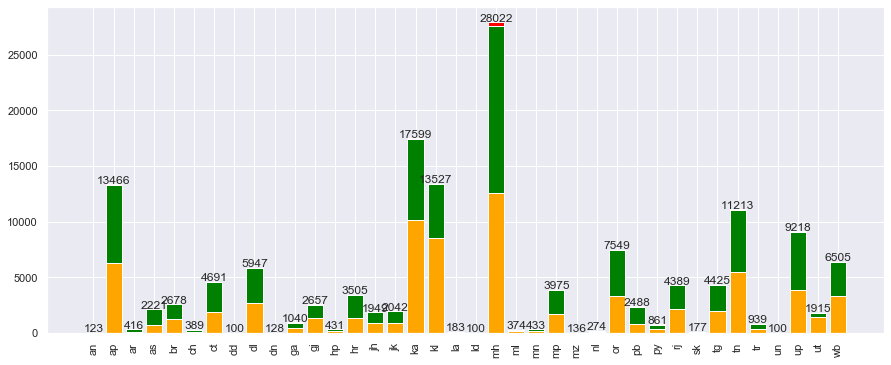

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='Red');
plt.xticks(rotation=90);

for i, val in enumerate(df_.index):
    y = df_.loc[val].sum() + 100
    x = i
    plt.text(x, y, str(y), ha="center");

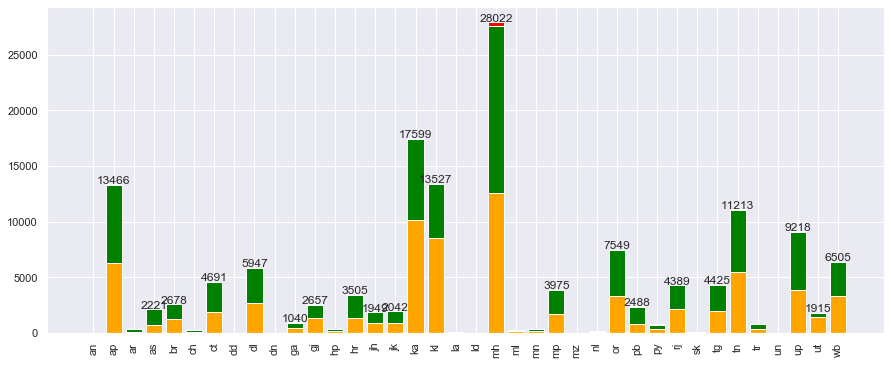

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='Red');
plt.xticks(rotation=90);

for i, val in enumerate(df_.index):
    y = df_.loc[val].sum() + 100
    if y > 1000:
        x = i
        plt.text(x, y, str(y), ha="center");

### Relative stacked bar plots

In [ ]:
df_.head()

status,Confirmed,Recovered,Deceased
an,16,7,0
ap,6242,7084,40
ar,127,189,0
as,756,1351,14
br,1261,1314,3


In [ ]:
df_['Total'] = 0

In [ ]:
df_['Total'] = df_.sum(axis = 1)

In [ ]:
df_.head()

status,Confirmed,Recovered,Deceased,Total
an,16,7,0,23
ap,6242,7084,40,13366
ar,127,189,0,316
as,756,1351,14,2121
br,1261,1314,3,2578


In [ ]:
df_['ConfirmedFraction'] = df_['Confirmed'] / df_['Total']
df_['RecoveredFraction'] = df_['Recovered'] / df_['Total']
df_['DeceasedFraction'] = df_['Deceased'] / df_['Total']

In [ ]:
df_.head()

status,Confirmed,Recovered,Deceased,Total,ConfirmedFraction,RecoveredFraction,DeceasedFraction
an,16,7,0,23,0.695652,0.304348,0.000000
ap,6242,7084,40,13366,0.467006,0.530001,0.002993
ar,127,189,0,316,0.401899,0.598101,0.000000
as,756,1351,14,2121,0.356436,0.636964,0.006601
br,1261,1314,3,2578,0.489139,0.509697,0.001164


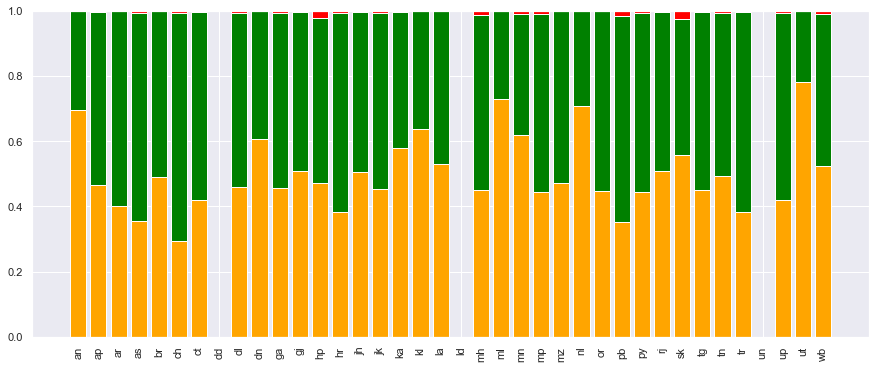

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.ConfirmedFraction, color='Orange');
plt.bar(df_.index, df_.RecoveredFraction, bottom=df_.ConfirmedFraction, color='Green');
plt.bar(df_.index, df_.DeceasedFraction, bottom=df_.ConfirmedFraction + df_.RecoveredFraction, color='Red');
plt.xticks(rotation=90);

In [ ]:
df_ = df_.sort_values('ConfirmedFraction', ascending=False)

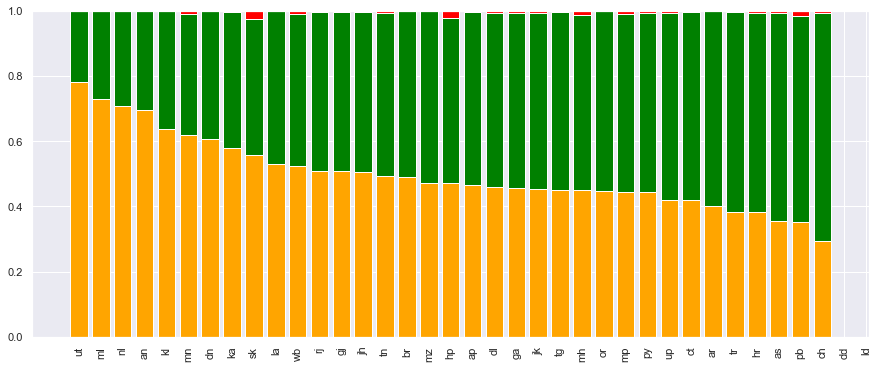

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.ConfirmedFraction, color='Orange');
plt.bar(df_.index, df_.RecoveredFraction, bottom=df_.ConfirmedFraction, color='Green');
plt.bar(df_.index, df_.DeceasedFraction, bottom=df_.ConfirmedFraction + df_.RecoveredFraction, color='Red');
plt.xticks(rotation=90);

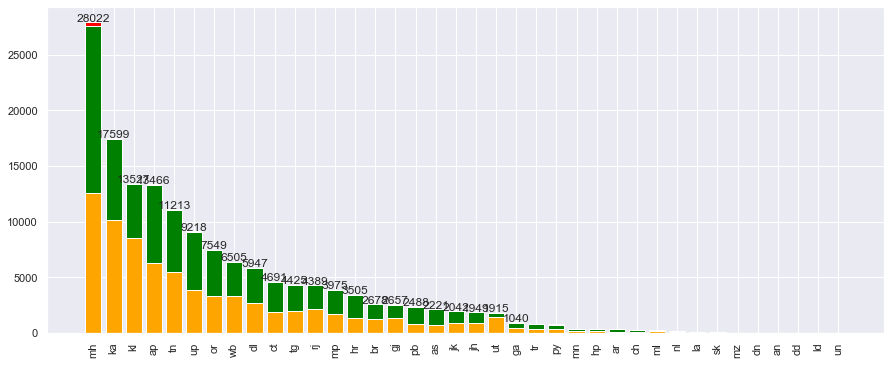

In [ ]:
df_ = df_.sort_values('Total', ascending=False)

fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='Red');
plt.xticks(rotation=90);

for i, val in enumerate(df_.index):
    y = df_.loc[val, 'Total'] + 100
    if y > 1000:
        x = i
        plt.text(x, y, str(y), ha="center");

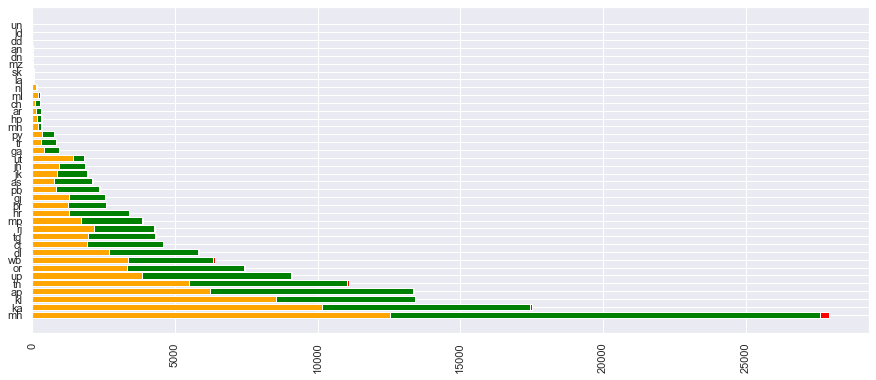

In [ ]:
df_ = df_.sort_values('Total', ascending=False)

fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.barh(df_.index, df_.Confirmed, color='Orange');
plt.barh(df_.index, df_.Recovered, left=df_.Confirmed, color='Green');
plt.barh(df_.index, df_.Deceased, left=df_.Confirmed + df_.Recovered, color='Red');
plt.xticks(rotation=90);

## Time-varying composition of data

### Stacked area plots

In [ ]:
 df.head()

,an,ap,ar,as,br,ch,ct,date,dd,dl,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,0,7,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,0,1,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,0,1,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,0,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,0,1,...,0,Recovered,1,0,0,4,0,0,0,0


In [ ]:
df_ = df[['mh', 'date', 'status']]

In [ ]:
df_.head()

,mh,date,status
0,14,14-Mar-20,Confirmed
1,0,14-Mar-20,Recovered
2,0,14-Mar-20,Deceased
3,18,15-Mar-20,Confirmed
4,0,15-Mar-20,Recovered


In [ ]:
df_['mh'] = pd.to_numeric(df_['mh'])
df_['date'] = pd.to_datetime(df_['date'])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_.head()

,mh,date,status
0,14,2020-03-14,Confirmed
1,0,2020-03-14,Recovered
2,0,2020-03-14,Deceased
3,18,2020-03-15,Confirmed
4,0,2020-03-15,Recovered


date    |   confirmed    |  recoverd   | deceased   |

2020-03-14   | 14 | 0 | 0

2020-03-14   | 18 | 0 | 0

pivot

In [ ]:
df_ = df_.pivot_table(values="mh", columns="status", index="date")

In [ ]:
df_.head()

status,Confirmed,Deceased,Recovered
date,,,
2020-03-14,14,0,0
2020-03-15,18,0,0
2020-03-16,6,0,0
2020-03-17,3,1,0
2020-03-18,3,0,0


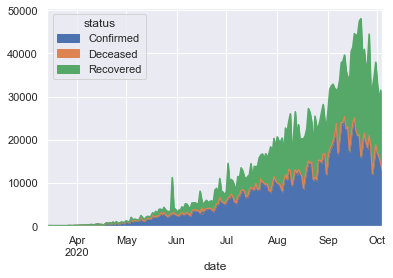

In [ ]:
df_.plot.area();

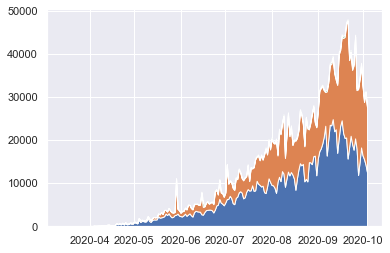

In [ ]:
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased);

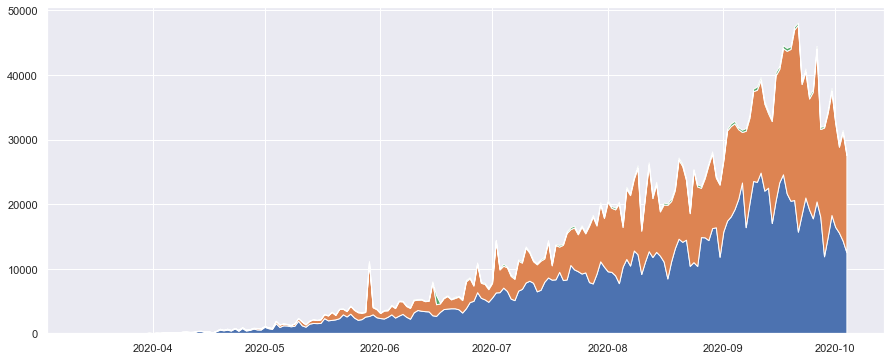

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased);

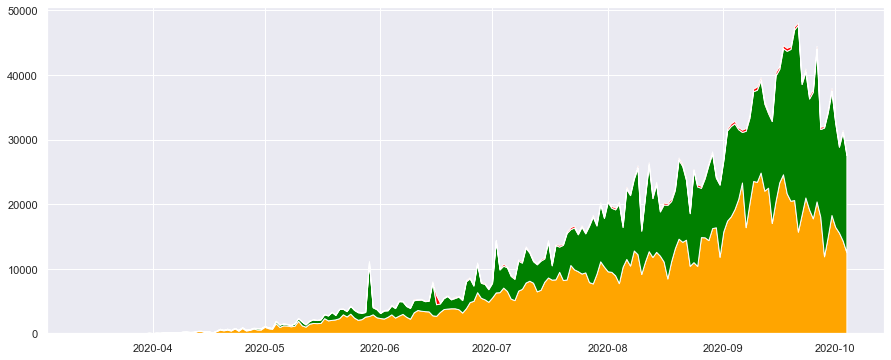

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased,
              colors=['orange', 'green', 'red']);

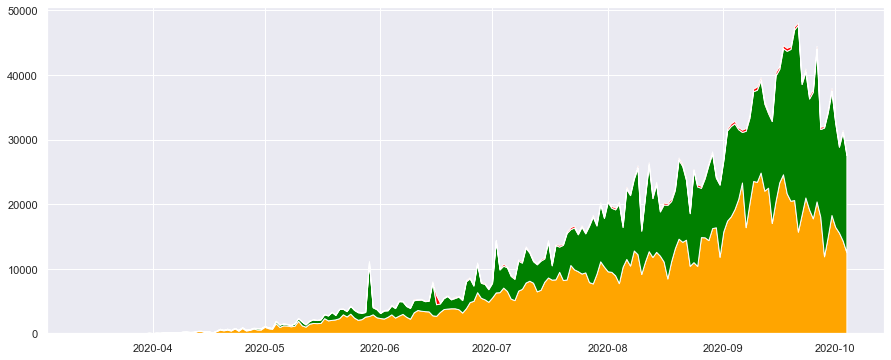

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased,
              labels=['Confirmed', 'Recovered', 'Deceased'],
              colors=['orange', 'green', 'red']);

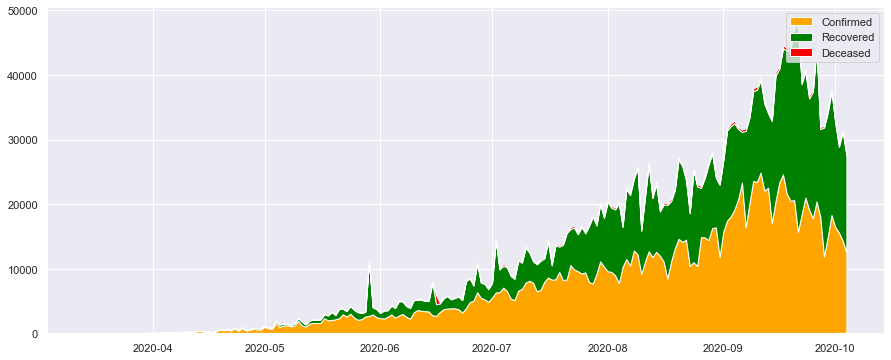

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased,
              labels=['Confirmed', 'Recovered', 'Deceased'],
              colors=['orange', 'green', 'red']);
plt.legend();

### Relative stacked area plot

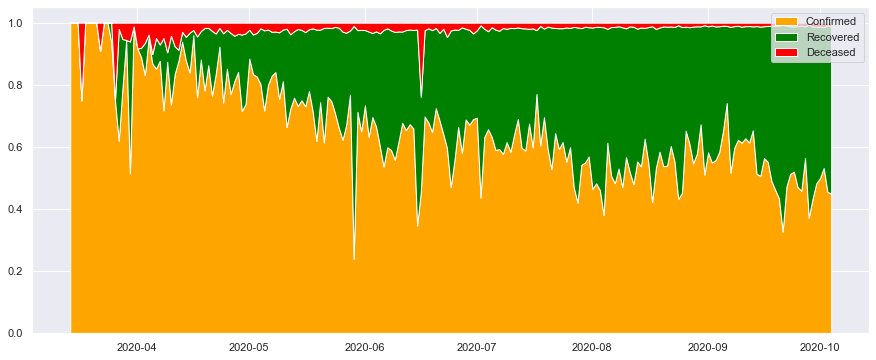

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.stackplot(df_.index, df_.Confirmed/df_.sum(axis=1), 
              df_.Recovered/df_.sum(axis=1), 
              df_.Deceased/df_.sum(axis=1),
              labels=['Confirmed', 'Recovered', 'Deceased'],
              colors=['orange', 'green', 'red']);
plt.legend();

In [ ]:
def plot_stacked_area_by_state(state):
    df_ = df[[state, 'date', 'status']]
    df_[state] = pd.to_numeric(df_[state])
    df_['date'] = pd.to_datetime(df_['date'])
    df_ = df_.pivot_table(values=state, columns="status", index="date")
    fig = plt.gcf();
    fig.set_size_inches(15, 6);
    plt.stackplot(df_.index, df_.Confirmed/df_.sum(axis=1), 
                df_.Recovered/df_.sum(axis=1), 
                df_.Deceased/df_.sum(axis=1),
                labels=['Confirmed', 'Recovered', 'Deceased'],
                colors=['orange', 'green', 'red']);
    plt.legend();

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


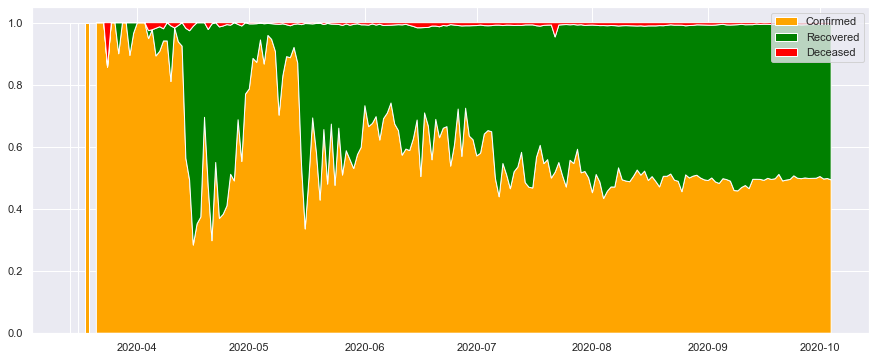

In [ ]:
plot_stacked_area_by_state('tn')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


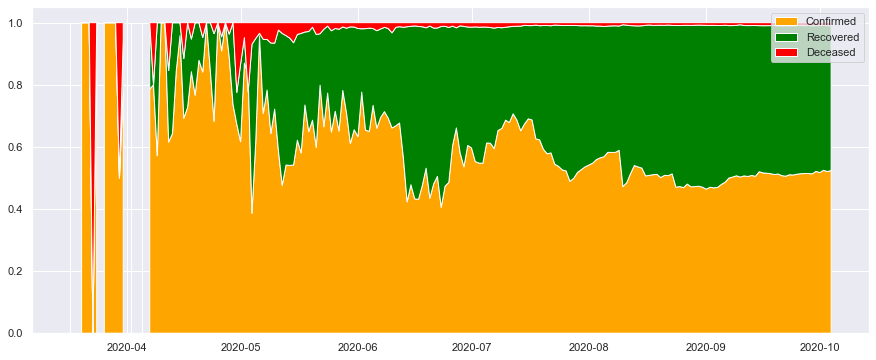

In [ ]:
plot_stacked_area_by_state('wb')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


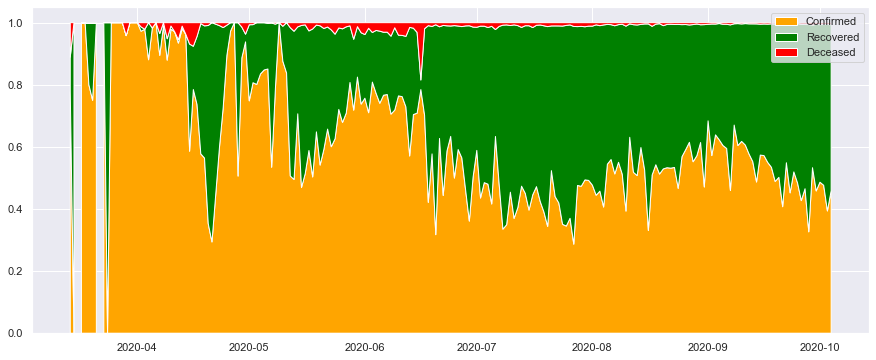

In [ ]:
plot_stacked_area_by_state('dl')

# Plotting relationships between data

## Scatter plot

In [ ]:
t = sns.load_dataset('tips')

In [ ]:
t.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


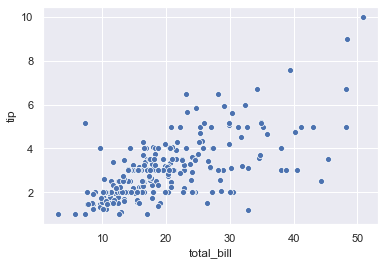

In [ ]:
sns.scatterplot(x='total_bill', y='tip', data=t);

In [ ]:
t['tip_fraction'] = t['tip']/t['total_bill']

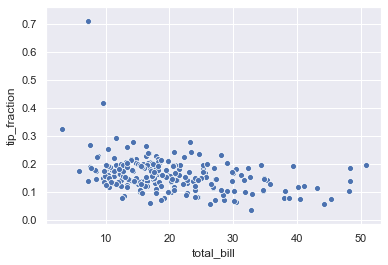

In [ ]:
sns.scatterplot(x='total_bill', y='tip_fraction', data=t);

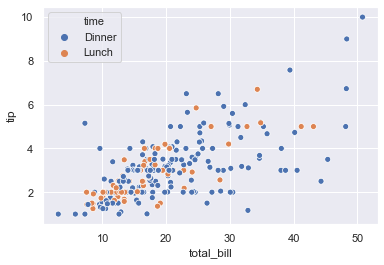

In [ ]:
sns.scatterplot(x='total_bill', y='tip', data=t,
                hue='time');

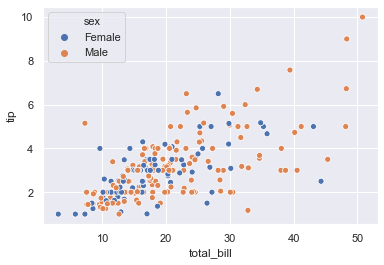

In [ ]:
sns.scatterplot(x='total_bill', y='tip', data=t,
                hue='sex');

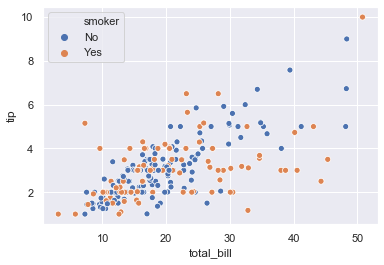

In [ ]:
sns.scatterplot(x='total_bill', y='tip', data=t,
                hue='smoker');

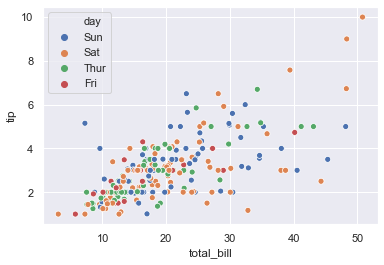

In [ ]:
sns.scatterplot(x='total_bill', y='tip', data=t,
                hue='day');

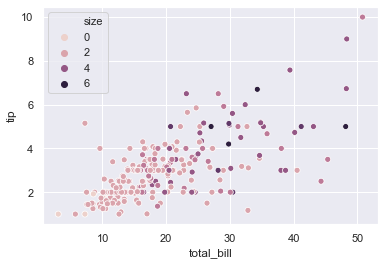

In [ ]:
sns.scatterplot(x='total_bill', y='tip', data=t,
                hue='size');

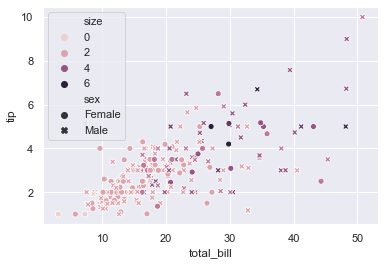

In [ ]:
sns.scatterplot(x='total_bill', y='tip', data=t,
                hue='size', style='sex');

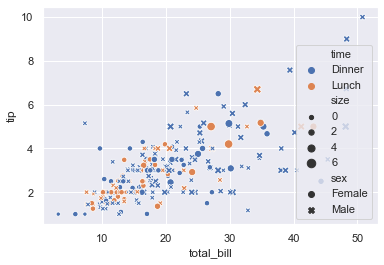

In [ ]:
sns.scatterplot(x='total_bill', y='tip', data=t,
                hue='time', style='sex', size='size');

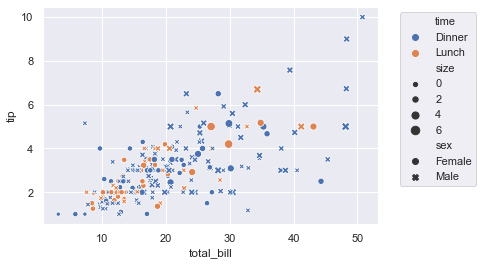

In [ ]:
sns.scatterplot(x='total_bill', y='tip', data=t,
                hue='time', style='sex', size='size');
plt.legend(bbox_to_anchor=(1.05, 1));

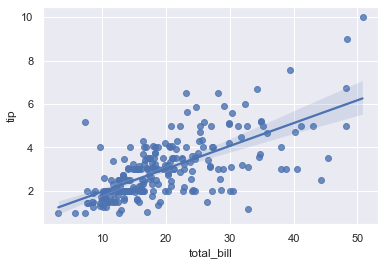

In [ ]:
sns.regplot(x='total_bill', y='tip', data=t);

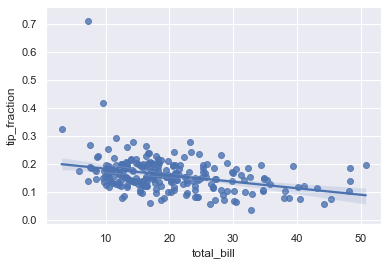

In [ ]:
sns.regplot(x='total_bill', y='tip_fraction', data=t);

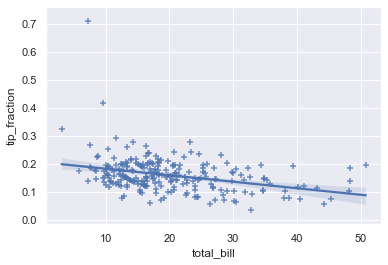

In [ ]:
sns.regplot(x='total_bill', y='tip_fraction', data=t, marker="+");

In [ ]:
d = sns.load_dataset('diamonds')

In [ ]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


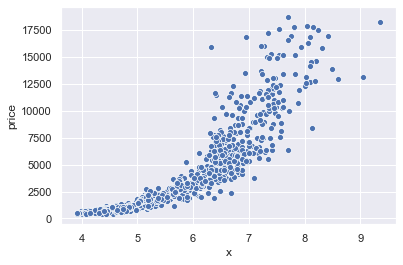

In [ ]:
sns.scatterplot('x', 'price', data=d.sample(1000));

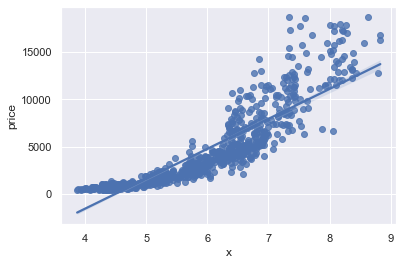

In [ ]:
sns.regplot('x', 'price', data=d.sample(1000));

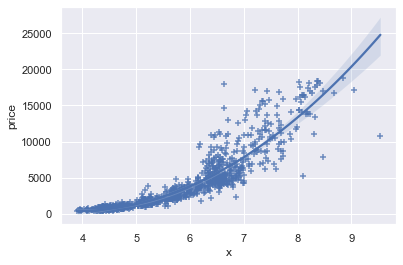

In [ ]:
sns.regplot('x', 'price', data=d.sample(1000), order=2, marker="+");

## Bar plots

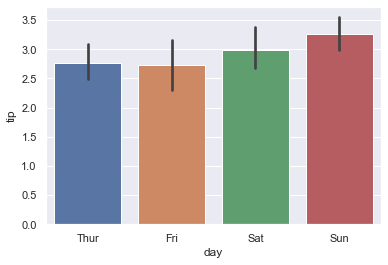

In [ ]:
sns.barplot(x="day", y ="tip", data=t);

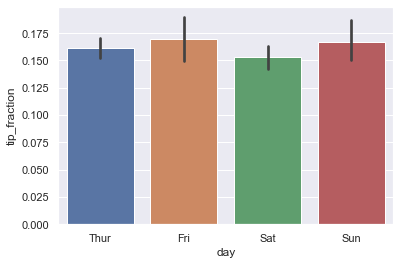

In [ ]:
sns.barplot(x="day", y ="tip_fraction", data=t);

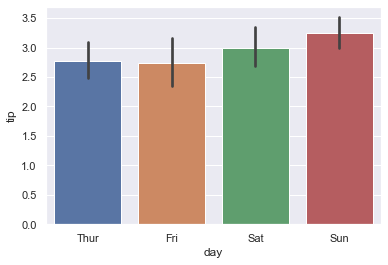

In [ ]:
sns.barplot(x="day", y ="tip", data=t);

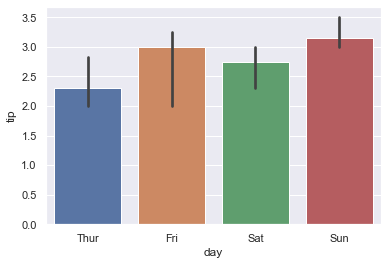

In [ ]:
sns.barplot(x="day", y ="tip", data=t, estimator=np.median);

In [ ]:
def my_estimate(v):
    return np.quantile(v, 0.25)

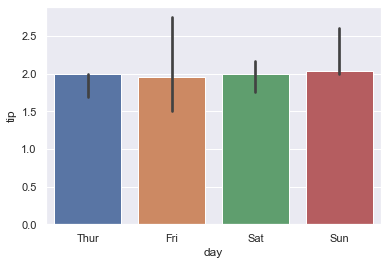

In [ ]:
sns.barplot(x="day", y ="tip", data=t, estimator=my_estimate);

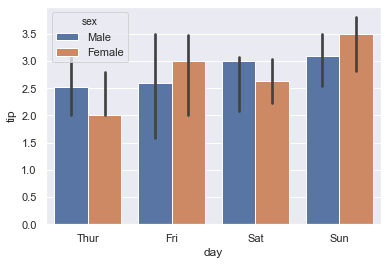

In [ ]:
sns.barplot(x="day", y ="tip", hue="sex", data=t, estimator=np.median);

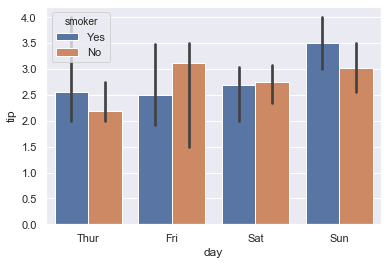

In [ ]:
sns.barplot(x="day", y ="tip", hue="smoker", data=t, estimator=np.median);

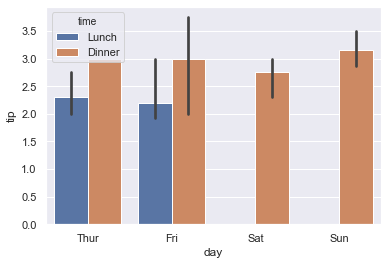

In [ ]:
sns.barplot(x="day", y ="tip", hue="time", data=t, estimator=np.median);

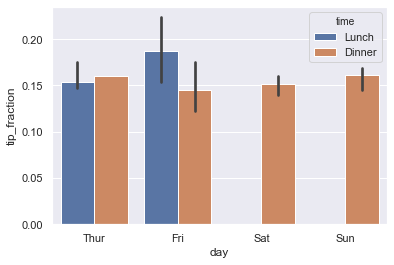

In [ ]:
sns.barplot(x="day", y ="tip_fraction", hue="time", data=t, estimator=np.median);

In [ ]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


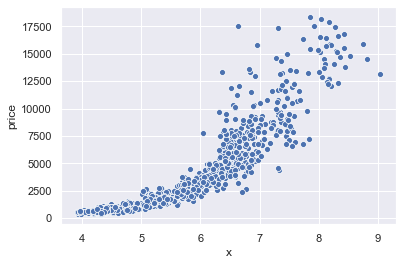

In [ ]:
sns.scatterplot('x', 'price', data=d.sample(1000));

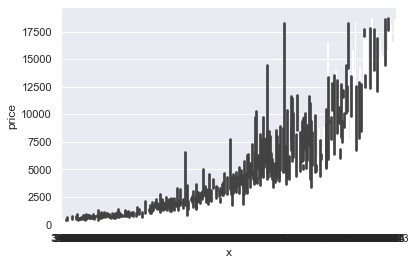

In [ ]:
sns.barplot('x', 'price', data=d.sample(1000));

In [ ]:
d['x_q'] = pd.cut(d['x'], bins=15);

In [ ]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,x_q
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"(3.58, 4.296]"
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"(3.58, 4.296]"
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"(3.58, 4.296]"
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"(3.58, 4.296]"
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"(4.296, 5.012]"


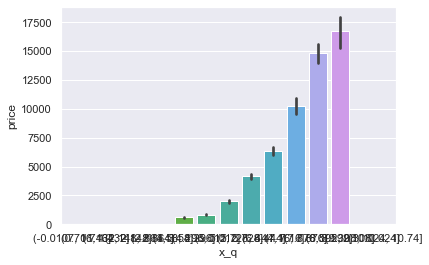

In [ ]:
sns.barplot('x_q', 'price', data=d.sample(1000));

In [ ]:
d['x_q'] = pd.cut(d['x'], bins=15, labels=False);

In [ ]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,x_q
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,6


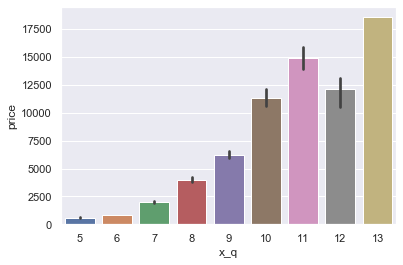

In [ ]:
sns.barplot('x_q', 'price', data=d.sample(1000));

## Line plot

In [ ]:
f = sns.load_dataset('fmri')

In [ ]:
f.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


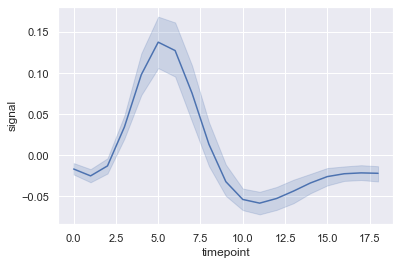

In [ ]:
sns.lineplot('timepoint', 'signal', data=f);

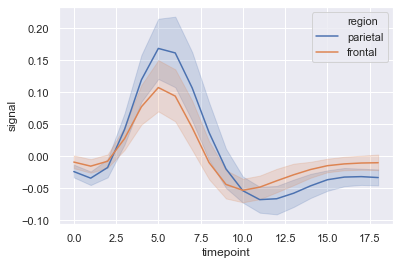

In [ ]:
sns.lineplot('timepoint', 'signal', data=f, hue="region");

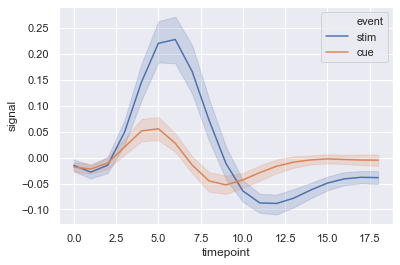

In [ ]:
sns.lineplot('timepoint', 'signal', data=f, hue="event");

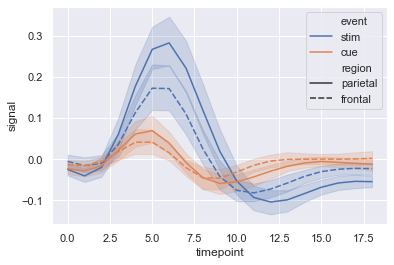

In [ ]:
sns.lineplot('timepoint', 'signal', data=f, hue="event", style="region");

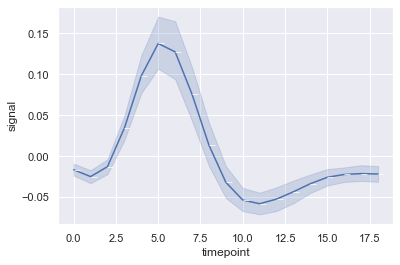

In [ ]:
sns.lineplot('timepoint', 'signal', data=f, marker=True);

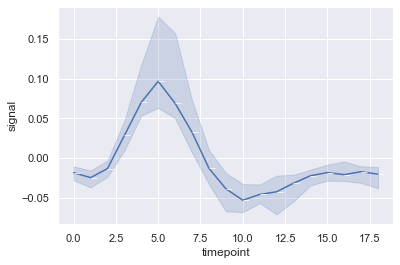

In [ ]:
sns.lineplot('timepoint', 'signal', data=f, marker=True, estimator=np.median);

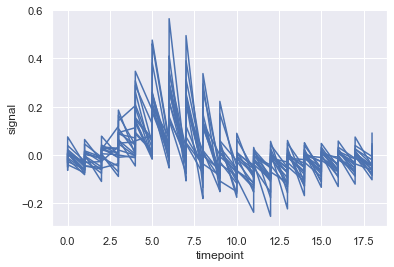

In [ ]:
sns.lineplot('timepoint', 'signal', data=f, units='subject', estimator=None);

In [ ]:
f_ = f[(f.region == "parietal") & (f.event == "cue")]

In [ ]:
f_.head()

,subject,timepoint,event,region,signal
532,s3,4,cue,parietal,0.058219
533,s6,5,cue,parietal,0.038145
534,s7,5,cue,parietal,-0.008158
535,s8,5,cue,parietal,0.047136
536,s9,5,cue,parietal,0.055847


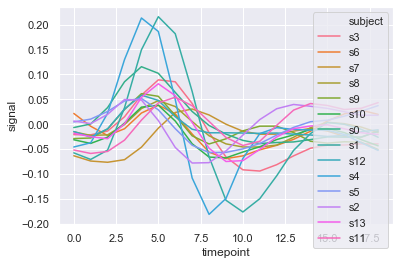

In [ ]:
sns.lineplot('timepoint', 'signal', data=f_, hue='subject', estimator=None);

In [ ]:
x = np.array([-3, -2, -1, 0, 1, 2, 3])

In [ ]:
y = x * x

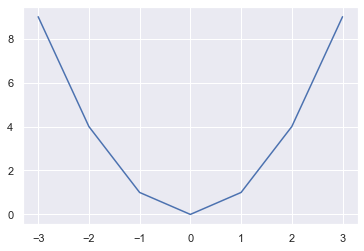

In [ ]:
sns.lineplot(x, y);

In [ ]:
with open('data.json') as f:
  data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)
df['date'] = pd.to_datetime(df['date']) 
df.drop('tt', axis=1, inplace=True)
df.set_index('date', inplace=True)
df = df[df['status'] == 'Confirmed']
df.drop('status', axis=1, inplace=True)
df = df.apply(pd.to_numeric)
df = df.rolling(7).mean()
df.reset_index(inplace=True)

In [ ]:
df.head()

,date,an,ap,ar,as,br,ch,ct,dd,dl,...,py,rj,sk,tg,tn,tr,un,up,ut,wb
0,2020-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


date | state | confirmed

2020-03-14 | an | 0

2020-03-14 | ap | 1

In [ ]:
df_ = pd.melt(df, id_vars="date", 
              value_vars = list(df.columns).remove("date"),
              var_name = "state", value_name = "confirmed")

In [ ]:
df_.head()

,date,state,confirmed
0,2020-03-14,an,NaN
1,2020-03-15,an,NaN
2,2020-03-16,an,NaN
3,2020-03-17,an,NaN
4,2020-03-18,an,NaN


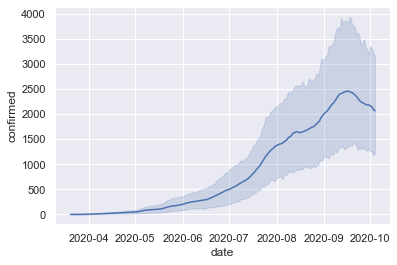

In [ ]:
sns.lineplot('date', 'confirmed', data=df_);

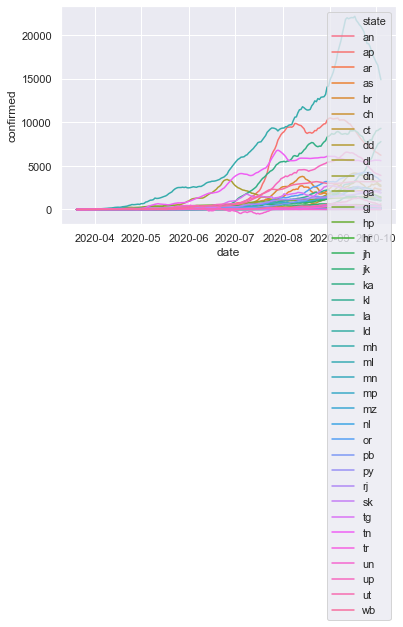

In [ ]:
sns.lineplot('date', 'confirmed', hue="state", data=df_);

In [ ]:
states = ['mh', 'tn', 'dl', 'wb', 'ka', 'gj']

In [ ]:
df_ = df_[df_.state.isin(states)]

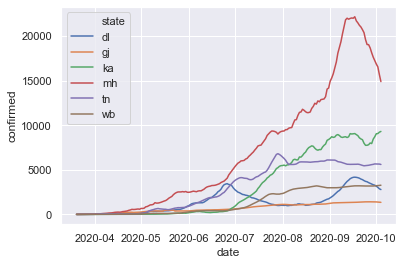

In [ ]:
sns.lineplot('date', 'confirmed', hue="state", data=df_);

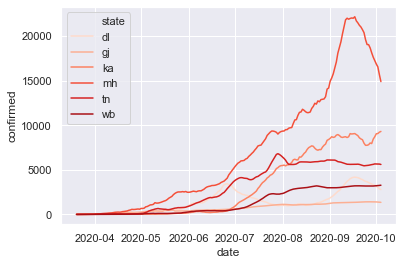

In [ ]:
sns.lineplot('date', 'confirmed', hue="state", data=df_,
             palette='Reds');

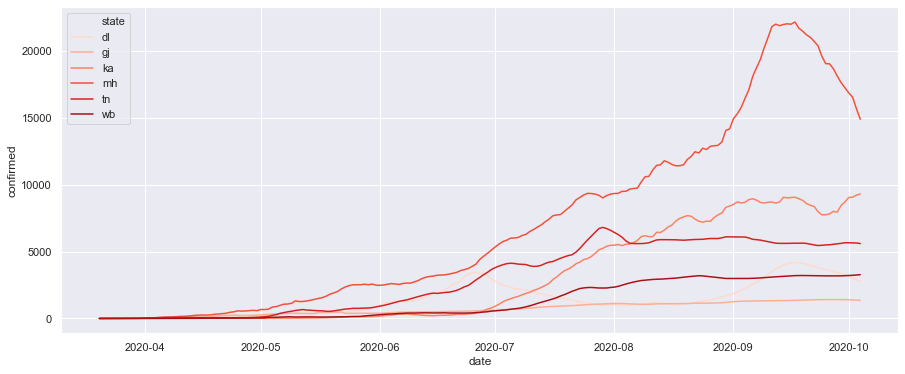

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.lineplot('date', 'confirmed', hue="state", data=df_,
             palette='Reds');

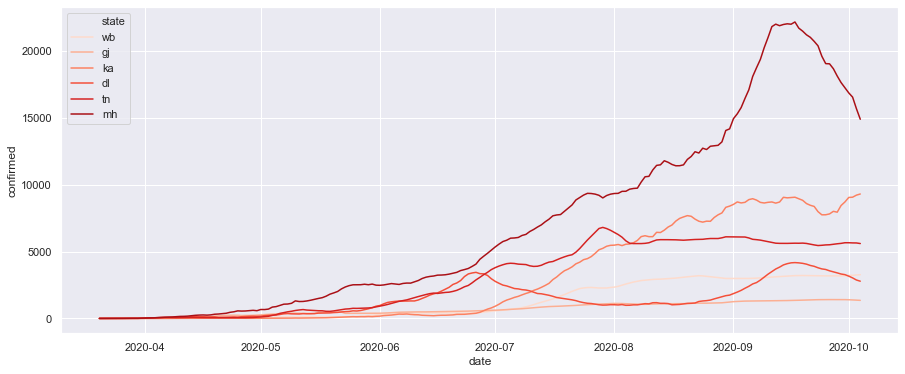

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.lineplot('date', 'confirmed', hue="state", data=df_,
             palette='Reds', hue_order = ['wb', 'gj', 'ka', 'dl', 'tn', 'mh']);

## Heatmap

X [10 x 10]

X(i, j) -> value

In [ ]:
x = np.random.rand(10, 10)

In [ ]:
x

array([[0.59993444, 0.71307113, 0.98834604, 0.81737489, 0.58722573,
        0.25770871, 0.45350171, 0.56011019, 0.95918524, 0.20598775],
       [0.03279801, 0.2183912 , 0.00791881, 0.86468172, 0.22977538,
        0.32719257, 0.8376593 , 0.36493838, 0.74435127, 0.517964  ],
       [0.83163897, 0.67471175, 0.45177354, 0.60728372, 0.65528158,
        0.54813821, 0.60102896, 0.98052338, 0.77858292, 0.59439065],
       [0.89111678, 0.22401659, 0.30508812, 0.22881468, 0.99340747,
        0.06746544, 0.45845241, 0.1965103 , 0.08895127, 0.3140559 ],
       [0.71671181, 0.87436861, 0.01243966, 0.38728644, 0.01985095,
        0.43436813, 0.06667003, 0.72423489, 0.85283813, 0.46244956],
       [0.65470357, 0.95082621, 0.28885735, 0.89882848, 0.6905144 ,
        0.85142652, 0.4434462 , 0.4477821 , 0.50523399, 0.17710492],
       [0.31220252, 0.96611463, 0.24305788, 0.11859041, 0.00188   ,
        0.39235726, 0.06156435, 0.32545612, 0.21225485, 0.59984232],
       [0.89536259, 0.98679582, 0.7259601

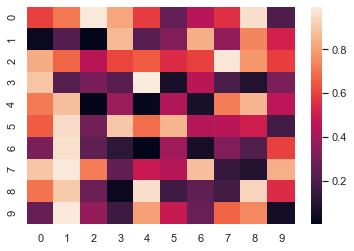

In [ ]:
sns.heatmap(x)

In [ ]:
fl = sns.load_dataset('flights')

In [ ]:
fl.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [ ]:
fl.sample(10)

,year,month,passengers
134,1960,March,419
10,1949,November,104
88,1956,May,318
6,1949,July,148
106,1957,November,305
4,1949,May,121
93,1956,October,306
37,1952,February,180
18,1950,July,170
128,1959,September,463


 	year 	month 	passengers

0 	1949 	January 	112

1 	1949 	February 	118

2 	1949 	March 	132



year    January February March

1949     112     118      132 

1950

1951




In [ ]:
fl_ = fl.pivot(index='year', columns='month', values='passengers');

In [ ]:
fl_.head()

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


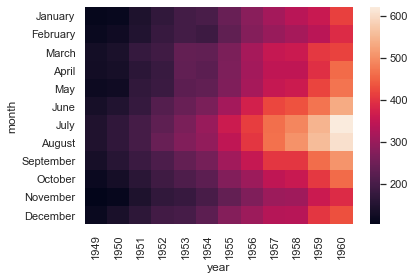

In [ ]:
sns.heatmap(fl_.T)

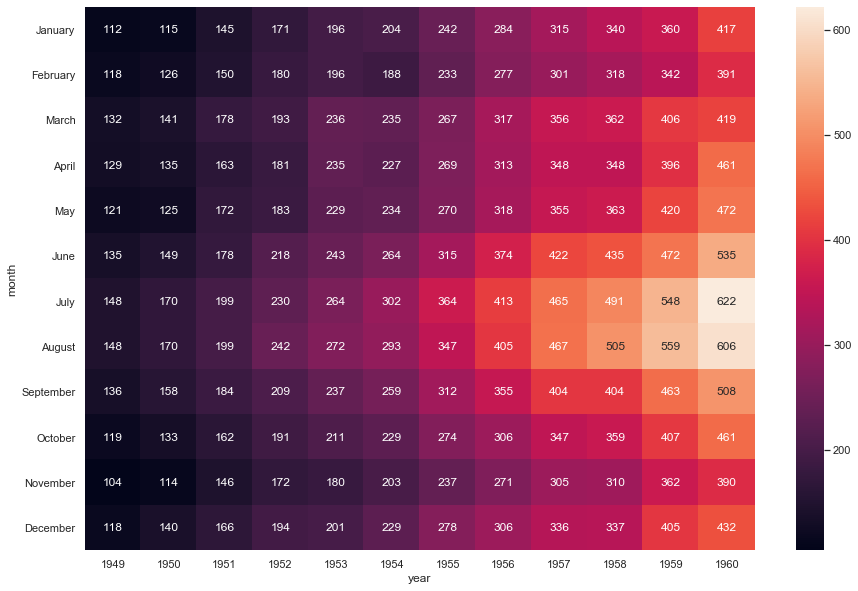

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 10)
sns.heatmap(fl_.T, annot=True, fmt="d");

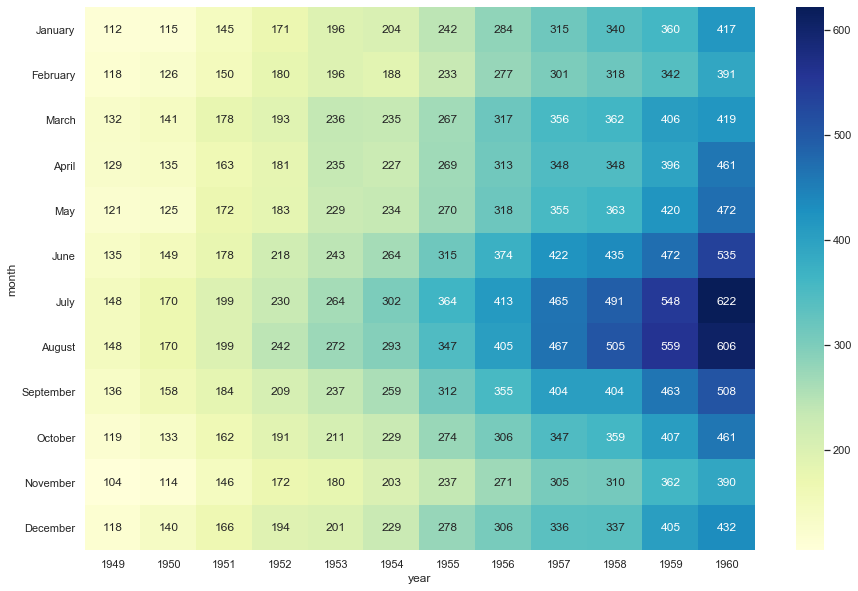

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 10)
sns.heatmap(fl_.T, annot=True, fmt="d", cmap="YlGnBu");

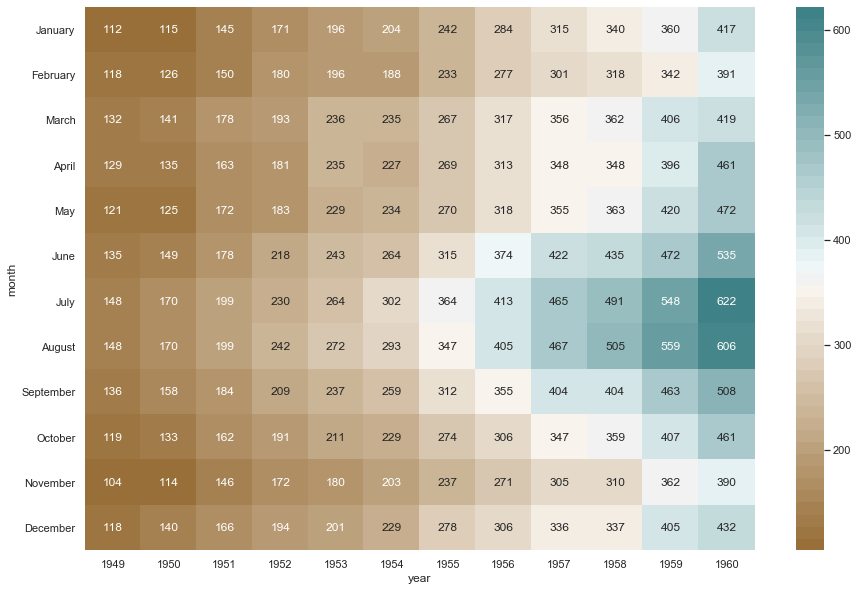

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 10)
sns.heatmap(fl_.T, annot=True, fmt="d", 
            cmap=sns.diverging_palette(50, 200, n=45));

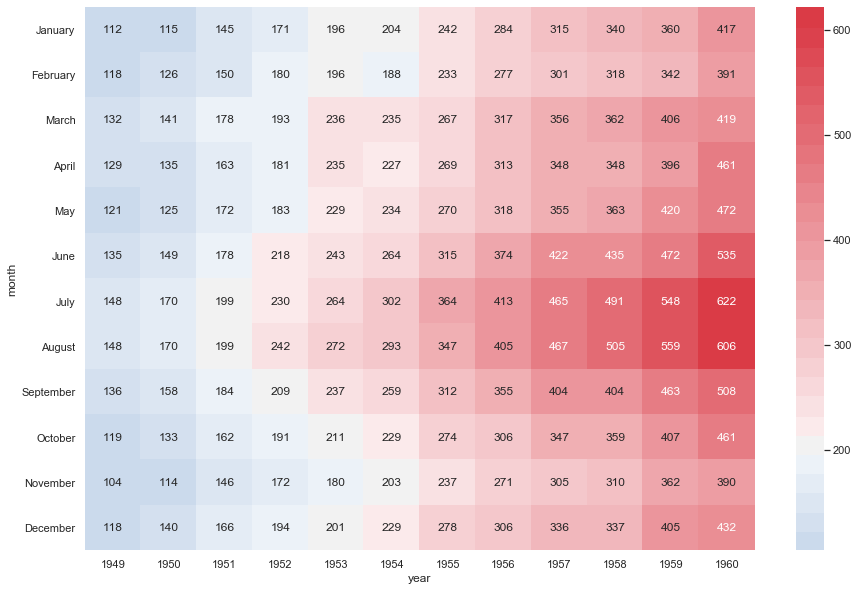

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 10)
sns.heatmap(fl_.T, annot=True, fmt="d", 
            cmap=sns.diverging_palette(250, 10, n=45),
            center=fl_.loc[1954, 'January']);

# Task on open-ended visualisation

http://ml-india.org/datasets/

In [ ]:
df = pd.read_excel('ameo_2015.xlsx')

In [ ]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
